In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

files = glob.glob('C:/Users/Dima/miniconda3/envs/myenv/lab2/data/rollingsales_*.xlsx')

df = pd.concat((pd.read_excel(file,engine='openpyxl') for file in files), ignore_index=True)

all_data = df[['BOROUGH', 'NEIGHBORHOOD','BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT','TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE','SALE PRICE','SALE DATE']].copy()

all_data.loc[:,'BOROUGH'] = all_data['BOROUGH'].replace({1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'})

all_data['SALE DATE'] = pd.to_datetime(all_data['SALE DATE'], errors='coerce', infer_datetime_format=True)
all_data['TAX CLASS AT PRESENT'] = all_data['TAX CLASS AT PRESENT'].str.strip()

all_data = all_data.dropna(subset=['SALE PRICE'])  # Вилучення рядків з NaN
all_data = all_data[all_data['SALE PRICE'] != 0]

all_data = all_data.dropna(subset=['SALE PRICE'])  
all_data = all_data[all_data['SALE PRICE'] != 0]
min_land_square_feet = all_data[all_data['LAND SQUARE FEET']> 0]['LAND SQUARE FEET'].min()
min_gross_square_feet = all_data[all_data['GROSS SQUARE FEET'] > 0]['GROSS SQUARE FEET'].min()

all_data['LAND SQUARE FEET'] = all_data['LAND SQUARE FEET'].fillna(min_land_square_feet).astype(int)
all_data['GROSS SQUARE FEET'] = all_data['GROSS SQUARE FEET'].fillna(min_gross_square_feet).astype(int)
all_data['TOTAL UNITS'] = all_data['TOTAL UNITS'].fillna(1).astype(int)
all_data.loc[all_data['TOTAL UNITS'] == 0, 'TOTAL UNITS'] = 1
all_data['LAND SQUARE FEET'] = all_data['LAND SQUARE FEET'].astype(int)
all_data['GROSS SQUARE FEET'] = all_data['GROSS SQUARE FEET'].astype(int)
all_data['TOTAL UNITS'] = all_data['TOTAL UNITS'].astype(int)
all_data['SALE PRICE'] = all_data['SALE PRICE'].astype(int)

use_class_mapping = {
    'RESIDENTIAL': ['FAMILY', 'RESIDENTIAL', 'APARTMENTS'],
    'NON-RESIDENTIAL': ['OFFICE', 'STORE', 'GARDENS', 'PARKING', 'FACTORY', 'GARAGES']
}

def determine_use_class(description):
    for use_class, keywords in use_class_mapping.items():
        for keyword in keywords:
            if keyword in description.upper():
                return use_class
    return 'ELSE'

all_data['BUILDING TYPE'] = all_data['BUILDING CLASS CATEGORY'].apply(determine_use_class)
all_data['PRICE PER SQFT'] = all_data['SALE PRICE'] / all_data['GROSS SQUARE FEET']

print(all_data)


             BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY  \
0              Bronx     BATHGATE     01 ONE FAMILY DWELLINGS   
1              Bronx     BATHGATE     01 ONE FAMILY DWELLINGS   
2              Bronx     BATHGATE     01 ONE FAMILY DWELLINGS   
3              Bronx     BATHGATE     01 ONE FAMILY DWELLINGS   
5              Bronx     BATHGATE     01 ONE FAMILY DWELLINGS   
...              ...          ...                         ...   
74135  Staten Island      WOODROW  05 TAX CLASS 1 VACANT LAND   
74136  Staten Island      WOODROW  05 TAX CLASS 1 VACANT LAND   
74137  Staten Island      WOODROW  05 TAX CLASS 1 VACANT LAND   
74138  Staten Island      WOODROW  05 TAX CLASS 1 VACANT LAND   
74139  Staten Island      WOODROW          22 STORE BUILDINGS   

      TAX CLASS AT PRESENT BUILDING CLASS AT PRESENT  TOTAL UNITS  \
0                        1                        A9            1   
1                        1                        A1            1   
2           

C:\Users\Dima\AppData\Local\Temp\ipykernel_46332\469645514.py:16: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  all_data['SALE DATE'] = pd.to_datetime(all_data['SALE DATE'], errors='coerce', infer_datetime_format=True)


In [2]:
import pandas as pd

has_nan = all_data['SALE PRICE'].isna().any()

has_zero = (all_data['SALE PRICE'] == 0).any()

if has_nan:
    print("У стовпці 'SALE PRICE' є NaN значення")

if has_zero:
    print("У стовпці 'SALE PRICE' є 0 значення")

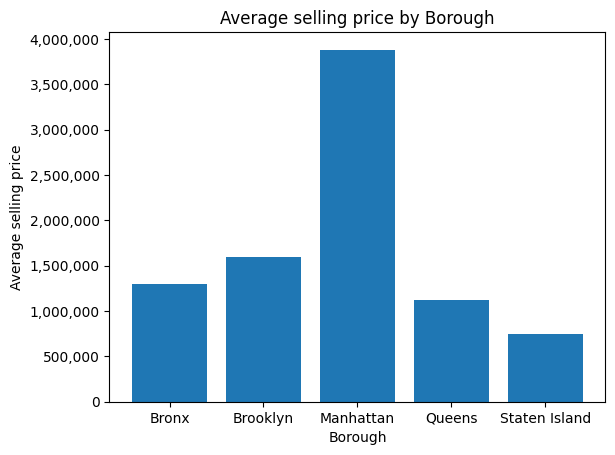

In [3]:
# середня ціна по району
average_price_by_borough = all_data.groupby('BOROUGH')['SALE PRICE'].mean().reset_index()
plt.bar(average_price_by_borough['BOROUGH'], average_price_by_borough['SALE PRICE'])
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Borough') 
plt.ylabel('Average selling price')
plt.title('Average selling price by Borough')
plt.show()



###
Cередня ціна по району.

З аналізу даних видно, що найдорожчим районом з величезним выдровом э Манхеттен, a найдешевшим э Staten Island.

Хоча треба визнати що всі чотири райони окрім Манхетенна є +- в одній ціновій категорії.

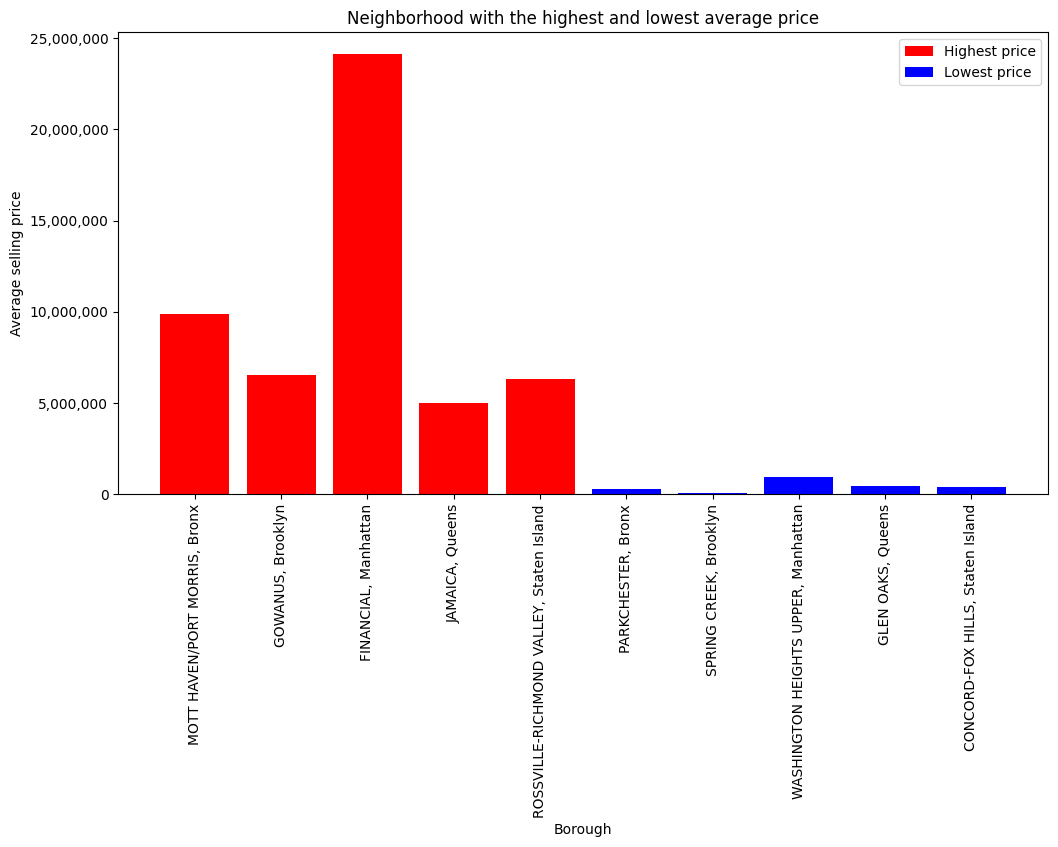

In [4]:
# Райони із найвищою та найнижчою середньою ціною

average_prices = all_data.groupby(['BOROUGH', 'NEIGHBORHOOD'])['SALE PRICE'].mean().reset_index()

highest_prices = average_prices.groupby('BOROUGH')['SALE PRICE'].idxmax()
neighborhoods_with_highest_prices = average_prices.loc[highest_prices]

lowest_prices = average_prices.groupby('BOROUGH')['SALE PRICE'].idxmin()
neighborhoods_with_lowest_prices = average_prices.loc[lowest_prices]

neighborhoods_highest_labels = [f'{row["NEIGHBORHOOD"]}, {row["BOROUGH"]}' for _, row in neighborhoods_with_highest_prices.iterrows()]
neighborhoods_lowest_labels = [f'{row["NEIGHBORHOOD"]}, {row["BOROUGH"]}' for _, row in neighborhoods_with_lowest_prices.iterrows()]

# Відобразимо результати на графіку
plt.figure(figsize=(12, 6))
plt.bar(neighborhoods_highest_labels, neighborhoods_with_highest_prices['SALE PRICE'], color='red', label='Highest price')
plt.bar(neighborhoods_lowest_labels, neighborhoods_with_lowest_prices['SALE PRICE'], color='blue', label='Lowest price')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Borough')
plt.ylabel('Average selling price')
plt.title('Neighborhood with the highest and lowest average price')
plt.xticks(rotation=90)
plt.legend()
plt.show()

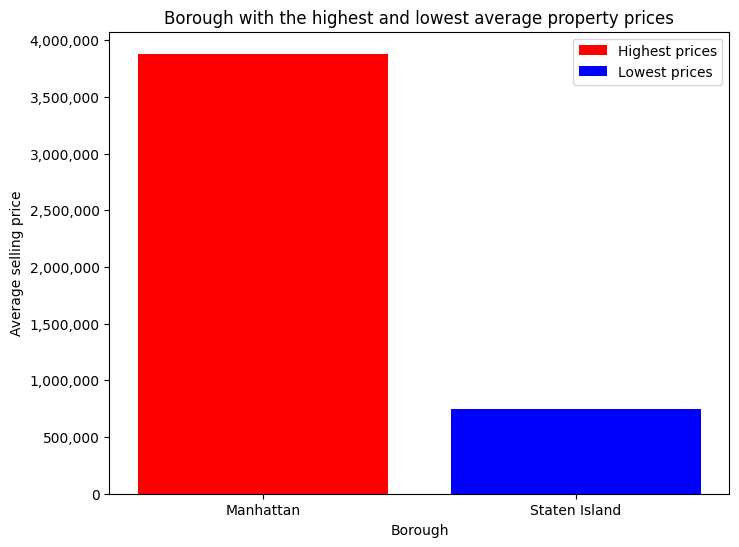

In [5]:
# Найвищі та найнижчі ціни

average_prices_by_borough = all_data.groupby('BOROUGH')['SALE PRICE'].mean().reset_index()

highest_price_borough = average_prices_by_borough.loc[average_prices_by_borough['SALE PRICE'].idxmax()]

lowest_price_borough = average_prices_by_borough.loc[average_prices_by_borough['SALE PRICE'].idxmin()]

# Відобразимо результати на графіку
plt.figure(figsize=(8, 6))
plt.bar(highest_price_borough['BOROUGH'], highest_price_borough['SALE PRICE'], color='red', label='Highest prices')
plt.bar(lowest_price_borough['BOROUGH'], lowest_price_borough['SALE PRICE'], color='blue', label='Lowest prices')
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('Borough')
plt.ylabel('Average selling price')
plt.title('Borough with the highest and lowest average property prices')
plt.legend()
plt.show()

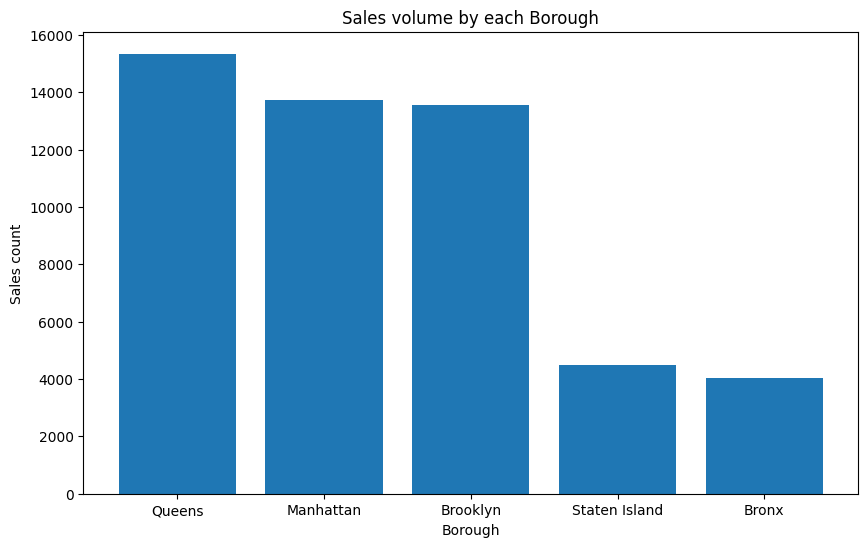

In [6]:
# Обсяг продажів
sales_by_borough = all_data['BOROUGH'].value_counts().reset_index()
sales_by_borough.columns = ['BOROUGH', 'SALES COUNT']

# Побудова графіку
plt.figure(figsize=(10, 6))
plt.bar(sales_by_borough['BOROUGH'], sales_by_borough['SALES COUNT'])
plt.xlabel('Borough')
plt.ylabel('Sales count')
plt.title('Sales volume by each Borough')
plt.show()

# print(sales_by_borough)

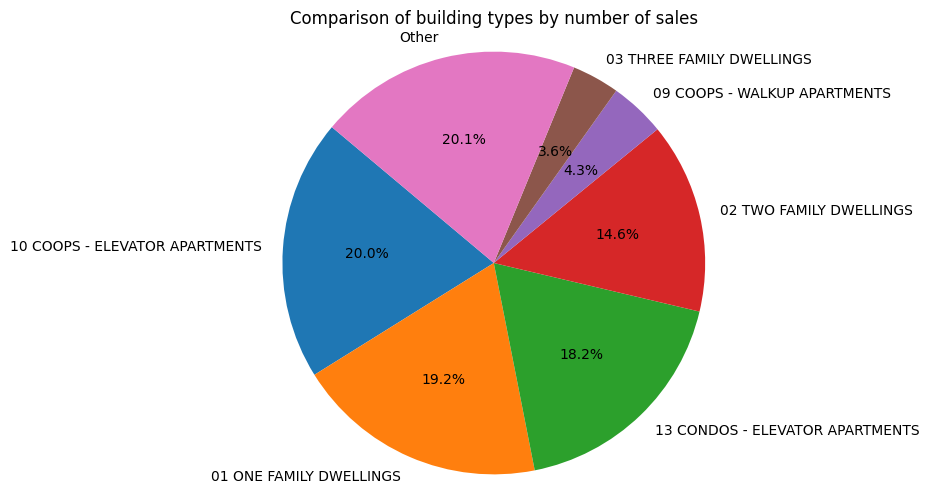

In [7]:
# Порівняння типів будівель за кількістю продажів
building_type_counts = all_data['BUILDING CLASS CATEGORY'].value_counts()
threshold = 1500
building_type_counts['Other'] = building_type_counts[building_type_counts < threshold].sum()
building_type_counts = building_type_counts[building_type_counts >= threshold]

plt.figure(figsize=(6, 6))
plt.pie(building_type_counts, labels=building_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Comparison of building types by number of sales')
plt.show()

BUILDING TYPE
RESIDENTIAL        44409
ELSE                4364
NON-RESIDENTIAL     2362
Name: count, dtype: int64
BUILDING CLASS CATEGORY
10 COOPS - ELEVATOR APARTMENTS                10218
01 ONE FAMILY DWELLINGS                        9834
13 CONDOS - ELEVATOR APARTMENTS                9310
02 TWO FAMILY DWELLINGS                        7462
09 COOPS - WALKUP APARTMENTS                   2180
03 THREE FAMILY DWELLINGS                      1857
07 RENTALS - WALKUP APARTMENTS                 1496
15 CONDOS - 2-10 UNIT RESIDENTIAL              1029
17 CONDO COOPS                                  992
44 CONDO PARKING                                981
04 TAX CLASS 1 CONDOS                           914
12 CONDOS - WALKUP APARTMENTS                   629
05 TAX CLASS 1 VACANT LAND                      560
22 STORE BUILDINGS                              494
08 RENTALS - ELEVATOR APARTMENTS                394
47 CONDO NON-BUSINESS STORAGE                   331
14 RENTALS - 4-10 UNIT       

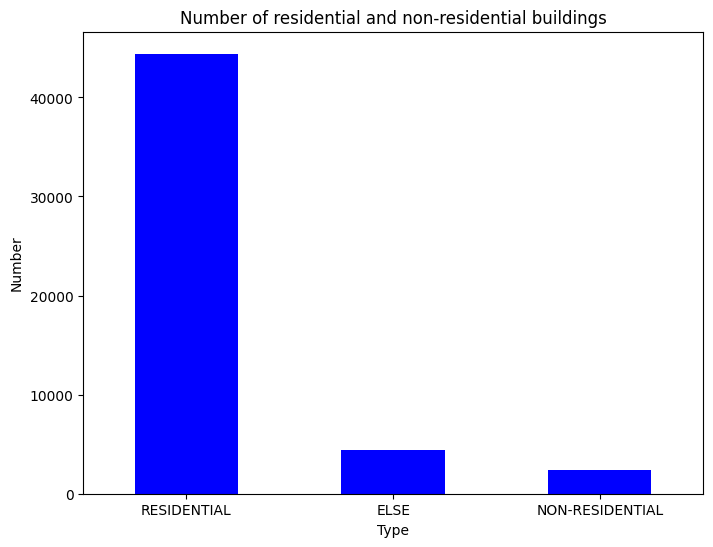

In [8]:
#Кількість житлових та нежитлових будівель
building_type_counts = all_data['BUILDING TYPE'].value_counts()
building_type_countsall = all_data['BUILDING CLASS CATEGORY'].value_counts()
print(building_type_counts)
print(building_type_countsall)

plt.figure(figsize=(8, 6))
building_type_counts.plot(kind='bar', color='blue')
plt.title('Number of residential and non-residential buildings')
plt.xlabel('Type')
plt.ylabel('Number')
plt.xticks(rotation=0)
plt.show()


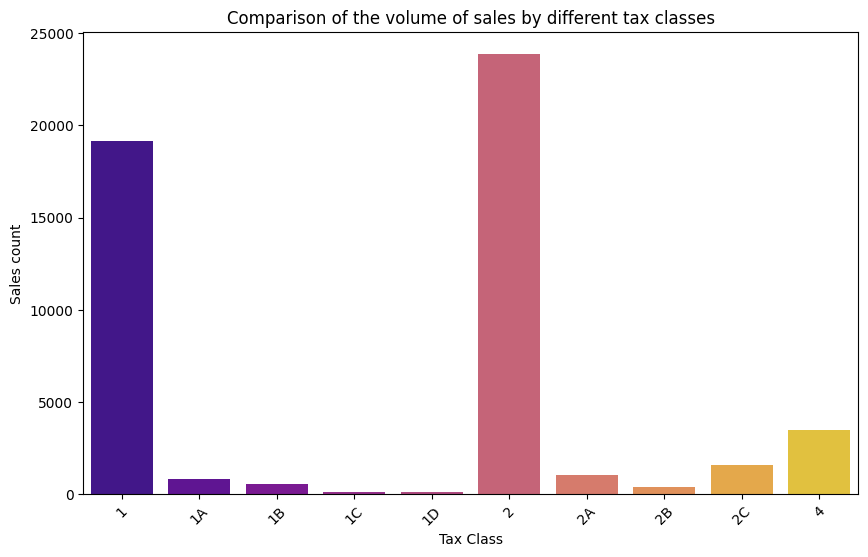

In [9]:
# Порівняння обсягу продажів за різними податковими класами
sales_by_tax_class = all_data.groupby('TAX CLASS AT PRESENT')['SALE PRICE'].count().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=sales_by_tax_class,hue ='TAX CLASS AT PRESENT', palette='plasma')
plt.xlabel('Tax Class')
plt.ylabel('Sales count')
plt.title('Comparison of the volume of sales by different tax classes')
plt.xticks(rotation=45)
plt.show()

         BOROUGH  PRICE PER SQFT
0          Bronx    1.267508e+05
1       Brooklyn    5.173852e+05
2      Manhattan    2.821097e+06
3         Queens    3.954957e+05
4  Staten Island    4.697356e+04


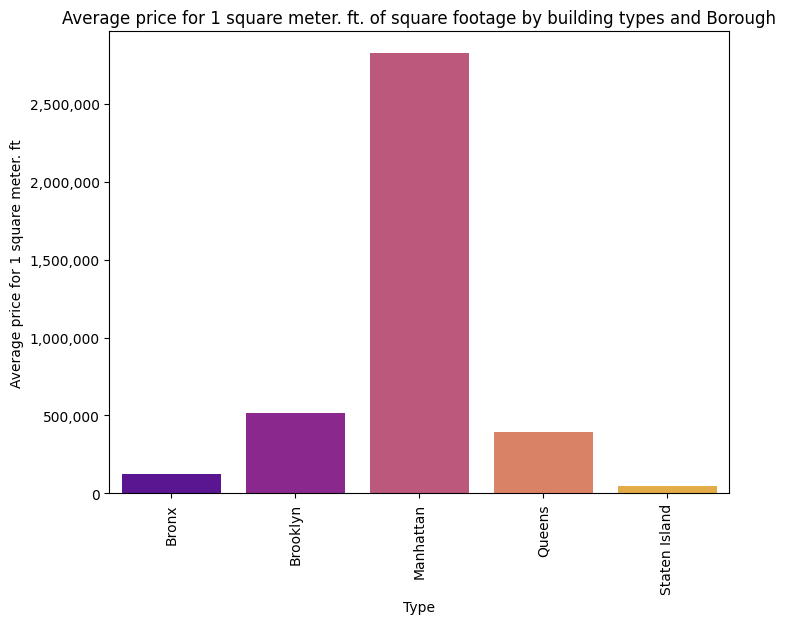

In [10]:
# Середня ціна за 1 кв. фут площі у Районі
filtered_data = all_data[(all_data['GROSS SQUARE FEET'] > 0)]

filtered_data.loc[:,'PRICE PER SQFT'] = filtered_data['SALE PRICE'] / filtered_data['GROSS SQUARE FEET']

price_per_sqft_by_building = filtered_data.groupby(['BOROUGH'])['PRICE PER SQFT'].mean().reset_index()

print(price_per_sqft_by_building)

plt.figure(figsize=(8, 6))
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
sns.barplot(data=price_per_sqft_by_building, x='BOROUGH', y='PRICE PER SQFT', hue='BOROUGH', palette='plasma')
plt.xlabel('Type')
plt.ylabel('Average price for 1 square meter. ft')
plt.title('Average price for 1 square meter. ft. of square footage by building types and Borough')
plt.xticks(rotation=90)
plt.show()

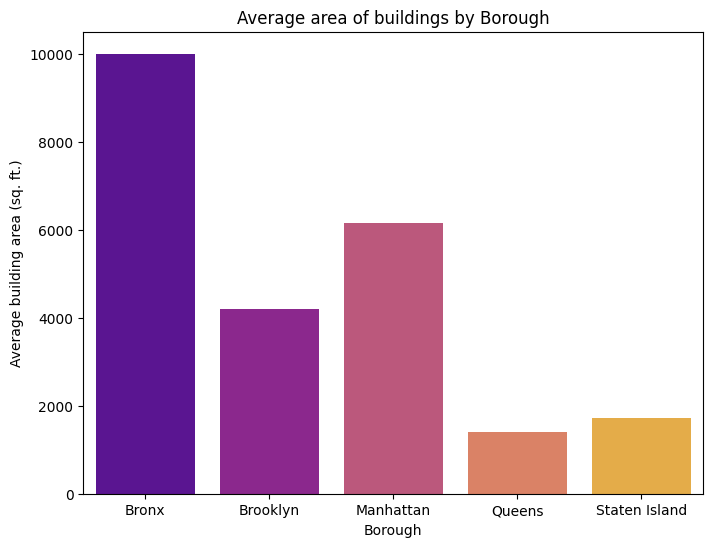

In [11]:
# Середня площа будівель за BOROUGH
filtered_data = all_data[all_data['GROSS SQUARE FEET'] > 0]

average_sqft_by_borough = filtered_data.groupby('BOROUGH')['GROSS SQUARE FEET'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=average_sqft_by_borough, x='BOROUGH', y='GROSS SQUARE FEET', hue='BOROUGH', palette='plasma')
plt.xlabel('Borough')
plt.ylabel('Average building area (sq. ft.)')
plt.title('Average area of buildings by Borough')
plt.show()

BOROUGH
Bronx             1651
Brooklyn         11238
Manhattan        32157
Queens           47843
Staten Island    69851
Name: GROSS SQUARE FEET, dtype: int64
             BOROUGH  GROSS SQUARE FEET
1651           Bronx            1598812
11238       Brooklyn             659725
32157      Manhattan            1291359
47843         Queens             266316
69851  Staten Island             143419


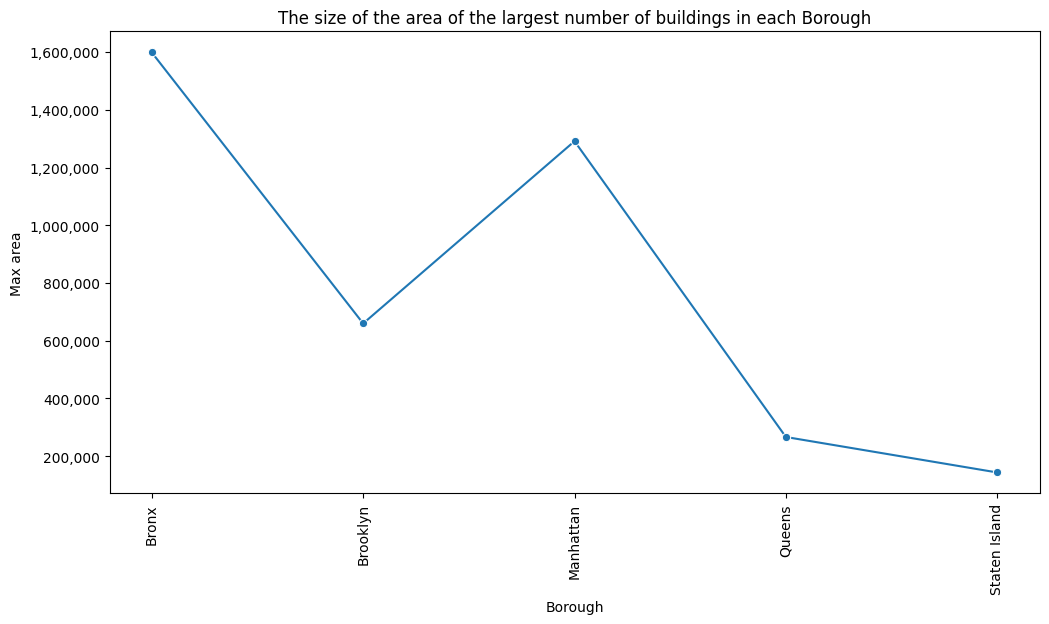

In [12]:
#Розмір площі, будівель з якою є  найбільа кількість в кожному районі

max_sqft_by_neighborhood = all_data.groupby('BOROUGH')['GROSS SQUARE FEET'].idxmax()
print(max_sqft_by_neighborhood)
neighborhood_max_sqft = all_data.loc[max_sqft_by_neighborhood, ['BOROUGH', 'GROSS SQUARE FEET']]
print(neighborhood_max_sqft)

plt.figure(figsize=(12, 6))
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
sns.lineplot(data=neighborhood_max_sqft, x='BOROUGH', y='GROSS SQUARE FEET', marker='o')
plt.xlabel('Borough')
plt.ylabel('Max area')
plt.title('The size of the area of the largest number of buildings in each Borough')
plt.xticks(rotation=90)
plt.show()

     TOTAL UNITS    SALE PRICE
0              1  1.835234e+06
1              2  1.199414e+06
2              3  1.598490e+06
3              4  2.370741e+06
4              5  4.393626e+06
..           ...           ...
130          484  1.037419e+08
131          485  4.875000e+08
132          509  5.850000e+05
133          550  3.084000e+06
134         1272  6.000000e+06

[135 rows x 2 columns]


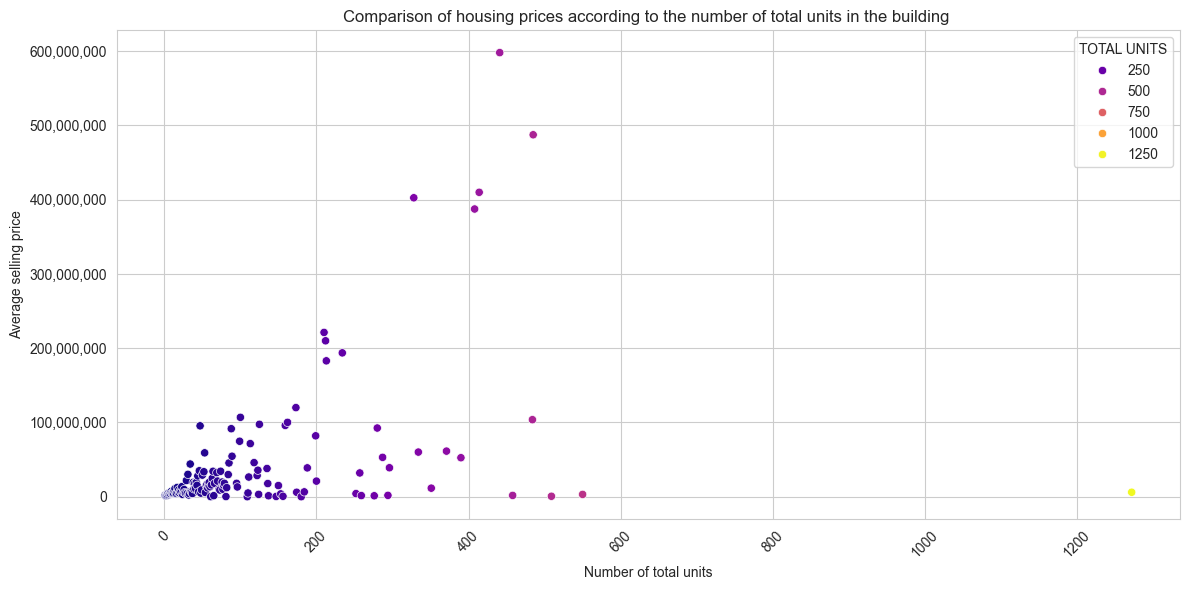

In [13]:
# Порівняння цін на житло відповідно до кількості житлових одиниць у будівлі
selected_columns = ['TOTAL UNITS', 'SALE PRICE', 'BUILDING CLASS CATEGORY']
data = all_data[selected_columns]

# # Видалімо рядки з відсутніми значеннями
# data = data.dropna()
# Згрупуємо дані за категорією будівлі та кількістю житлових одиниць та обчислимо середню ціну
grouped_data = data.groupby('TOTAL UNITS')['SALE PRICE'].mean().reset_index()
print(grouped_data)
# Побудуємо графік
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.scatterplot(data=grouped_data, x='TOTAL UNITS', y='SALE PRICE', hue='TOTAL UNITS', palette='plasma')
plt.title('Comparison of housing prices according to the number of total units in the building ')
plt.xlabel('Number of total units')
plt.ylabel('Average selling price')
plt.xticks(rotation=45)
plt.gca().get_yaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()